In [36]:
from qiskit.transpiler import Target, InstructionProperties
from qiskit.circuit.library import RGate, RZGate, CZGate, GR, GRZ
from qiskit.circuit import Parameter

def generate_target(n: int):
    target = Target()
    theta = Parameter('theta')
    phi = Parameter('phi')

    cz_props = {(i, j): InstructionProperties(duration=1) for i in range(n) for j in range(i + 1, n)}
    target.add_instruction(CZGate(), cz_props)
    r_props = {(i,): InstructionProperties(duration=1) for i in range(n)}
    target.add_instruction(RGate(theta, phi), r_props)
    target.add_instruction(RZGate(theta), r_props)
    gr_props = {(): InstructionProperties(duration=1)}
    target.add_instruction(GR(n, theta, phi), gr_props)
    target.add_instruction(GRZ(n, theta), gr_props)
    return target

target = generate_target(3)

TypeError: unsupported format string passed to Parameter.__format__

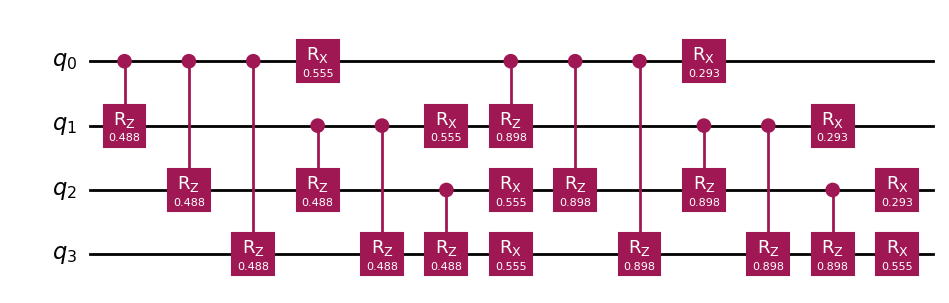

In [37]:
from qiskit import QuantumCircuit, transpile
from math import pi

a = 0.15524282950959892 * pi
b = 0.1766811937 * pi
c = 0.2858383611880559 * pi
d = 0.0931081293 * pi

circ = QuantumCircuit(4);

circ.crz(a, 0, 1)
circ.crz(a, 0, 2)
circ.crz(a, 0, 3)

circ.rx(b, 0)

circ.crz(a, 1, 2)
circ.crz(a, 1, 3)

circ.rx(b, 1)

circ.crz(a, 2, 3)

circ.rx(b, 2)
circ.rx(b, 3)


circ.crz(c, 0, 1)
circ.crz(c, 0, 2)
circ.crz(c, 0, 3)

circ.rx(d, 0)

circ.crz(c, 1, 2)
circ.crz(c, 1, 3)

circ.rx(d, 1)

circ.crz(c, 2, 3)

circ.rx(d, 2)
circ.rx(b, 3)

circ.draw('mpl')

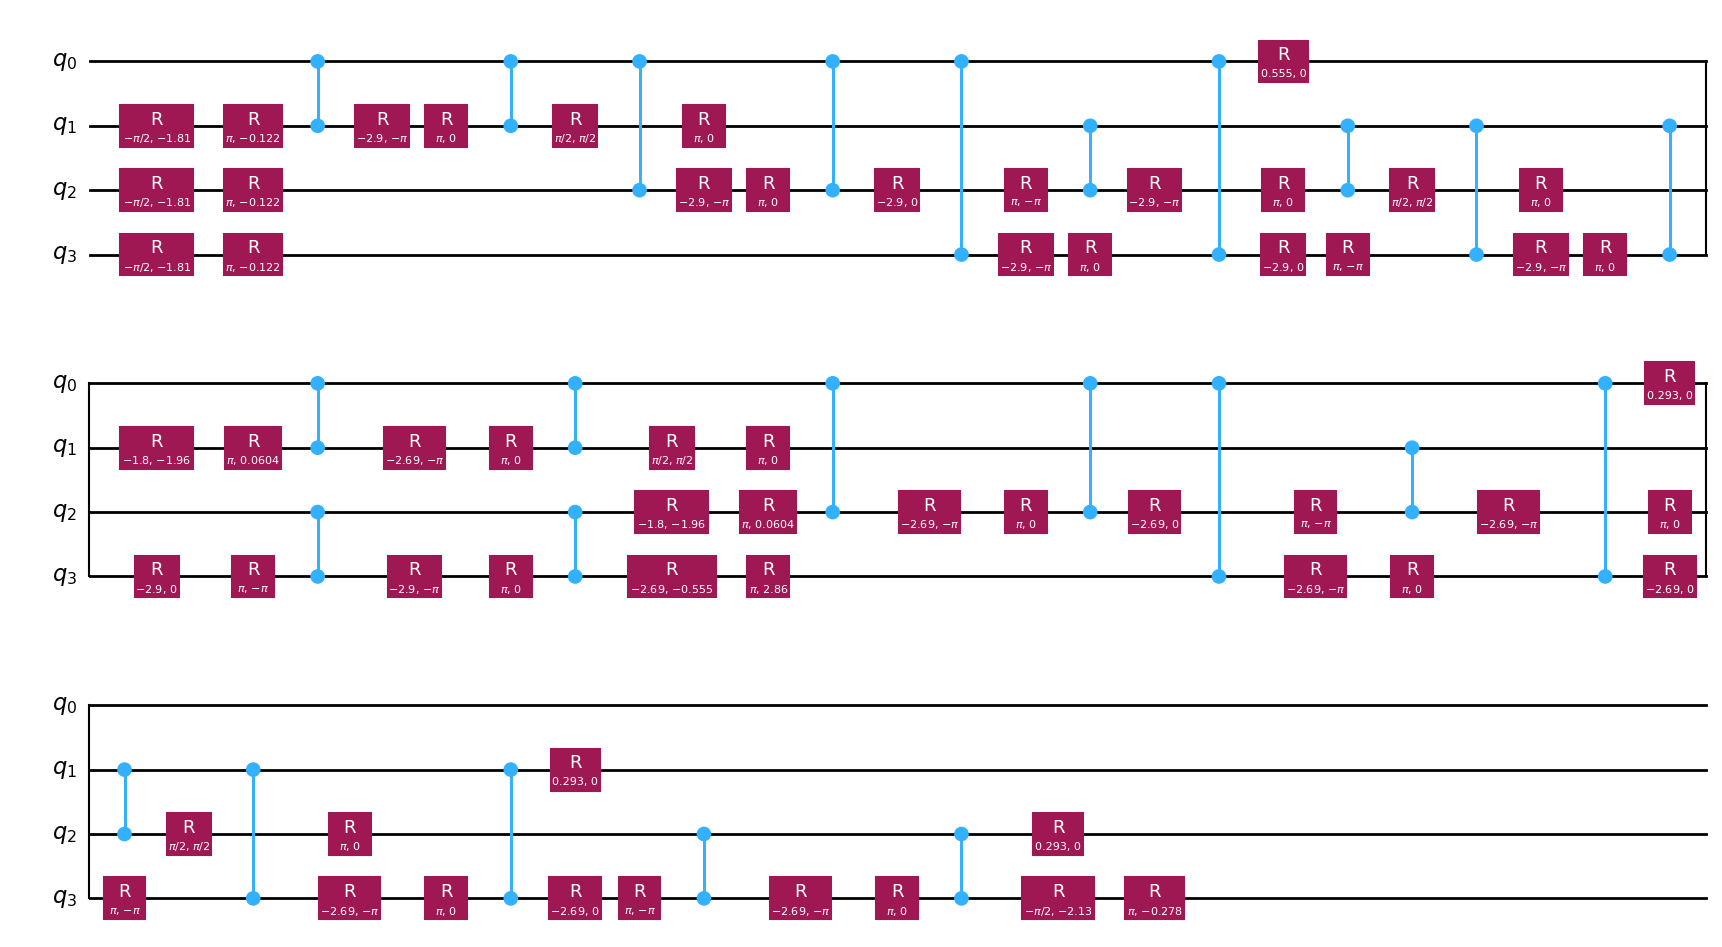

In [39]:
circ_tr = transpile(circ,
                    basis_gates=basis_gates,
                    optimization_level=3)
circ_tr.draw('mpl')